# Introduction to Statistical Learning

I shall be completing the applied exercises from Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani in these Jupyter Notebooks

# Chapter 3 Linear Regression

In [73]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model as lm
from matplotlib import pyplot as plt

df = pd.read_csv("Datasets\Auto.csv")



print(df.head())


#using statsmodel to compute the OLS and get a result

res = smf.ols('mpg ~ horsepower', data=df).fit()

print(res.params)

print(res.summary())







    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Intercept            19.594118
horsepower[T.102]     0.405882
horsepower[T.103]     0.705882
horsepower[T.105]     0.905882
horsepower[T.107]     1.405882
                       ...    
horsepower[T.95]      2.520168
horsepower[T.96]      7.572549
horsepower[T.97]      2.528105
horsepower[T.98]      0.655882
horse




Again there appears to be an issue with the horsepower variable data. statsmodel is providing a coefficient 
for every variable





In [74]:
#cleaning the horsepower variable and converting it to a float (since objects are treated as categorical)

df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')

print(df.isna().sum())

df = df.dropna(subset=['horsepower'])

print(df.isna().sum())


df['mpg'] = pd.to_numeric(df['mpg'],errors='coerce')

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


<ipython-input-74-45bb65589021>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mpg'] = pd.to_numeric(df['mpg'],errors='coerce')


In [75]:
res = smf.ols('mpg ~ horsepower', data=df).fit()

print(res.params)

print(res.summary())

Intercept     39.935861
horsepower    -0.157845
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           7.03e-81
Time:                        11:08:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [76]:
#predicted mpg if horsepower = 98

res.params[0]+98*res.params[1]

24.467077152512424

In [77]:
# 95% confidence interval

print(res.conf_int())

# Prediction interval

upper = res.conf_int()[1][1]
lower = res.conf_int()[0][1]

upperpredict = res.params[0]+98*upper
lowerpredict = res.params[0]+98*lower

print(f"Upper prediction is {upperpredict}, lower prediction is {lowerpredict}")

                    0          1
Intercept   38.525212  41.346510
horsepower  -0.170517  -0.145172
Upper prediction is 25.708960113361353, lower prediction is 23.225194191663498


<class 'pandas.core.series.Series'>


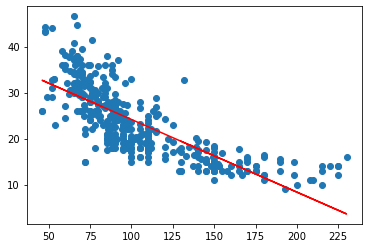

In [78]:
print(type(df['horsepower']))

#df['response'] = res.params[0] + res.params[1]*float(df['horsepower']) <- This didn't work

#cannot multiply series by a float (i believe this multiplies number of entries)

#so converting df['horsepower'] from series to array before manipulating

df['response'] = res.params[0] + res.params[1] * np.asarray(df['horsepower'])



plt.scatter(df['horsepower'], df['mpg'])
plt.plot(df['horsepower'], df['response'], color='r')

plt.show()




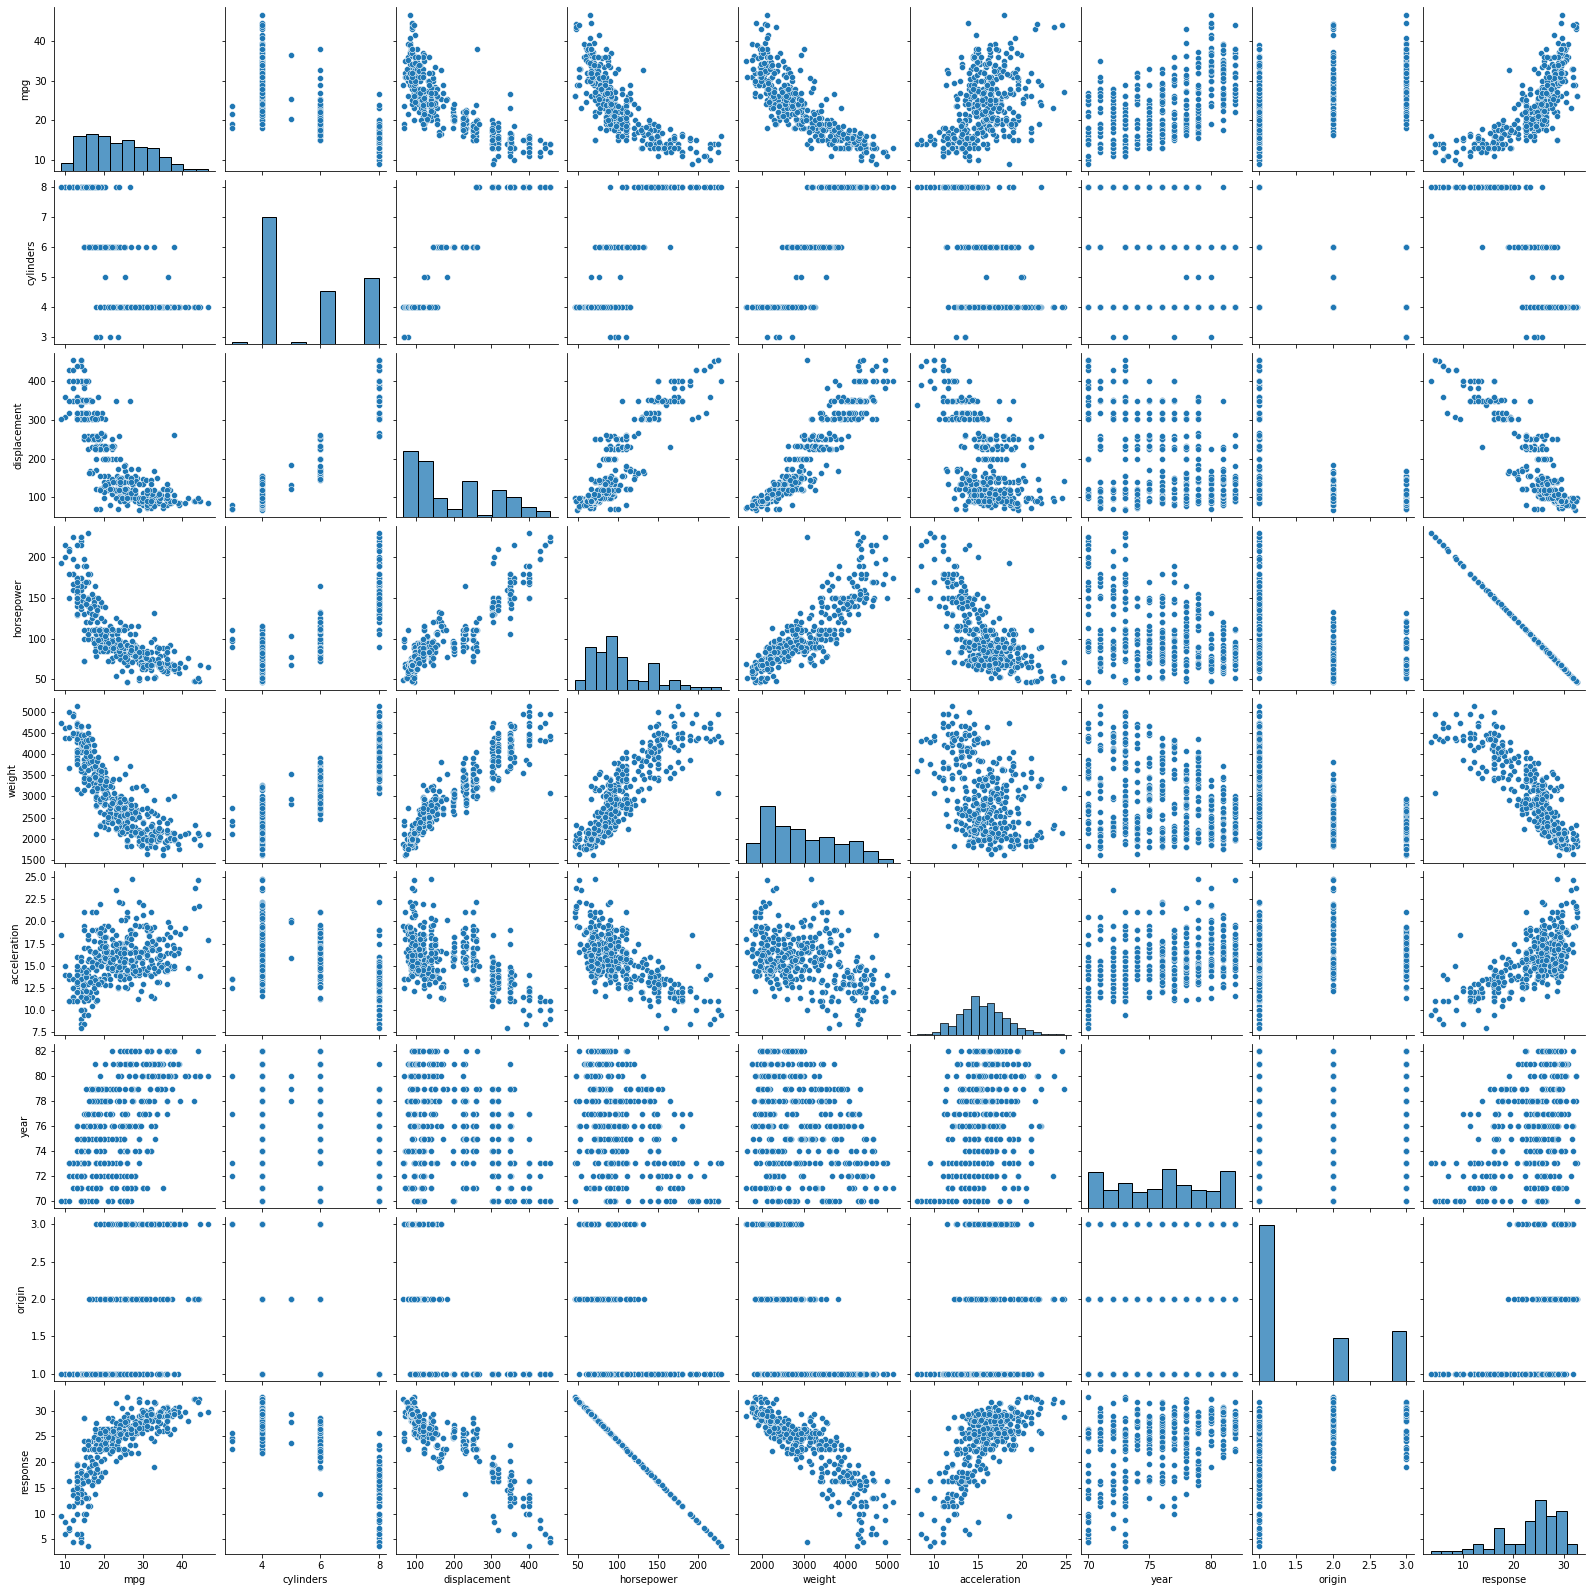

In [79]:
import seaborn as sns

sns.pairplot(df)

In [80]:
#correlation matrix
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,response
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.778427
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.842983
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.897257
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-1.000000
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.864538
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.689196
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.416361
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.455171
response,0.778427,-0.842983,-0.897257,-1.000000,-0.864538,0.689196,0.416361,0.455171,1.000000


In [81]:
result = smf.ols("mpg ~ cylinders + displacement + weight + acceleration + year + origin", df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     293.9
Date:                Sun, 02 Jan 2022   Prob (F-statistic):          2.42e-140
Time:                        11:09:11   Log-Likelihood:                -1024.2
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     385   BIC:                             2090.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.7438      4.168     -4.737      0.000     -27.939     -11.549
cylinders       -0.4447      0.321     -1.385      0.167      -1.076       0.187
displacement     0.0172      0.007      2.390      0.017       0.003       0.031
weight          -0.0068      0.001    -11.767      0.000      -0.008      -0.006
acceleration     0.1557      0.078      2.002      0.046       0.003       0.309
year             0.7647      0.050     15.378      0.000       0.667       0.862
origin           1.3460      0.271      4.975      0.000       0.814       1.878
==============================================================================
Omnibus:                       30.593   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.017
Skew:                           0.509   Prob(JB):                     8.35e-12
Kurtosis:                       4.444   Cond. No.                     7.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

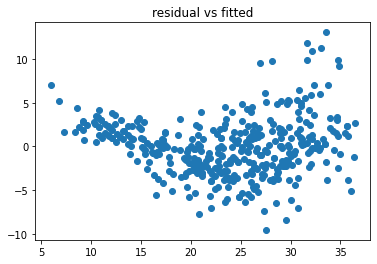

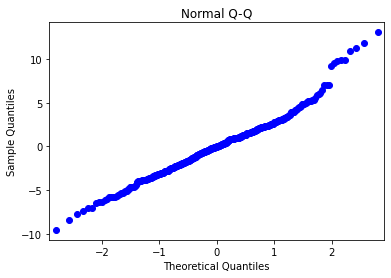

In [82]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
result_influence = OLSInfluence(result)



df['response'] = result.params[0] +  result.params[1] * np.asarray(df['cylinders']) +  result.params[2] * np.asarray(df['displacement']) +  result.params[3] * np.asarray(df['weight']) +  result.params[4] * np.asarray(df['acceleration'])+  result.params[5] * np.asarray(df['year']) +  result.params[6] * np.asarray(df['origin'])


#diagnostic plots

#results vs residuals
plt.scatter(df['response'], result.resid)
#instead of df['resonse'], result.fittedvalue works
plt.title("residual vs fitted")
plt.show()


fig = sm.qqplot(result.resid)
plt.title("Normal Q-Q")
plt.show()

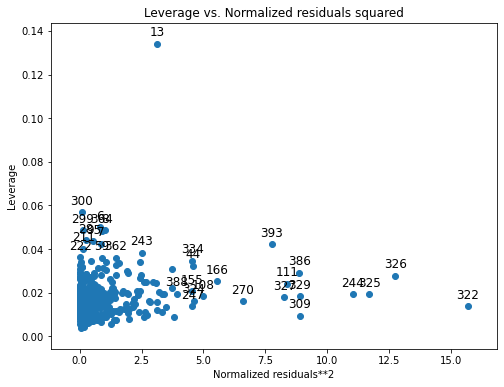

In [83]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2 as plr

fig, ax = plt.subplots(figsize=(8,6))
fig = plr(result, ax = ax)

In [84]:
#we see that obs 13 is a very high leverage observation

In [85]:
np.random.seed(1)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

#linear regression w/o intercept - not using "y ~ x" as this generates B0 automatically, and using sm.OLS() rather than smf.ols()
#sm seems to accept this but smf doesn't

newres = sm.OLS(endog=y,exog=x).fit()

newres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Sun, 02 Jan 2022   Prob (F-statistic):                    3.46e-36
Time:                        11:09:12   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#other way around

newres = sm.OLS(endog=x,exog=y).fit()

newres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Sun, 02 Jan 2022   Prob (F-statistic):                    3.46e-36
Time:                        11:09:12   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
#note that R^2 is same in both above - because it is equivalent to correlation^2
#the F statistic and t statistic (of coefficient) is also the same as expected

#seeing t stat when constant is added
newres = sm.OLS(endog=y,exog=x).fit()


x = sm.add_constant(x)
newres = sm.OLS(endog=y,exog=x).fit()
newres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           5.39e-36
Time:                        11:09:12   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.121      -0.039       0.334
x1             2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#t stat is equal to when there was no constant

In [89]:
np.random.seed(1)
x1 = np.random.rand(100)
x2 = 0.5 * x1 + np.random.rand(100)/10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.randn(100)

# correlation between x1 and x2

np.corrcoef(x1, x2)

array([[1.        , 0.97747398],
       [0.97747398, 1.        ]])

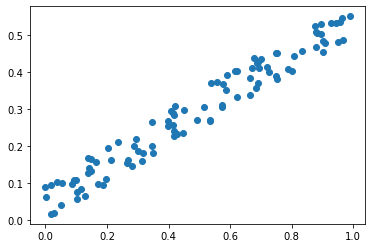

In [90]:
plt.scatter(x1,x2)

In [91]:

x = np.column_stack((x1,x2))
x = sm.add_constant(x)

res = sm.OLS(y,x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     16.13
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           8.95e-07
Time:                        11:09:12   Log-Likelihood:                -144.37
No. Observations:                 100   AIC:                             294.7
Df Residuals:                      97   BIC:                             302.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2250      0.259      8.583      0.000       1.710       2.739
x1             2.4383      1.675      1.456      0.149      -0.886       5.763
x2            -0.8693      3.292     -0.264      0.792      -7.404       5.665
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.393
Skew:                           0.118   Prob(JB):                        0.822
Kurtosis:                       2.804   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#Neither x1 nor x2 are significant when both in model

res = sm.OLS(y,x1).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              383.8
Date:                Sun, 02 Jan 2022   Prob (F-statistic):                    7.71e-36
Time:                        11:09:12   Log-Likelihood:                         -184.18
No. Observations:                 100   AIC:                                      370.4
Df Residuals:                      99   BIC:                                      373.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.2904      0.270     19.592      0.000       4.755       5.826
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                1.919
Skew:                           0.170   Prob(JB):                        0.383
Kurtosis:                       2.412   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
res = sm.OLS(y,x2).fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              478.7
Date:                Sun, 02 Jan 2022   Prob (F-statistic):                    1.06e-39
Time:                        11:09:12   Log-Likelihood:                         -175.22
No. Observations:                 100   AIC:                                      352.4
Df Residuals:                      99   BIC:                                      355.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.3648      0.428     21.879      0.000       8.516      10.214
==============================================================================
Omnibus:                        1.108   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                1.076
Skew:                           0.108   Prob(JB):                        0.584
Kurtosis:                       2.540   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#but separately, they are significant. This implies colinearity

In [95]:
#adding a new observation

y = np.append(y, 6)
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
print(len(x1))
print(len(x2))
#seeing if this affects results
x = np.column_stack((x1,x2))
x = sm.add_constant(x)
res = sm.OLS(y,x).fit()
res.summary()

101
101


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     18.11
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           2.03e-07
Time:                        11:09:12   Log-Likelihood:                -146.74
No. Observations:                 101   AIC:                             299.5
Df Residuals:                      98   BIC:                             307.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9991      0.223      8.965      0.000       1.557       2.442
x1            -0.0749      0.736     -0.102      0.919      -1.535       1.385
x2             4.1206      1.382      2.982      0.004       1.378       6.863
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.370
Skew:                           0.075   Prob(JB):                        0.831
Kurtosis:                       2.744   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

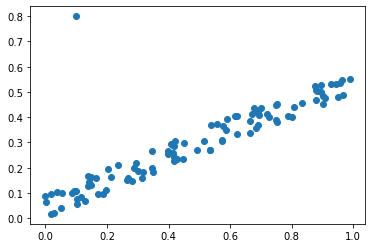

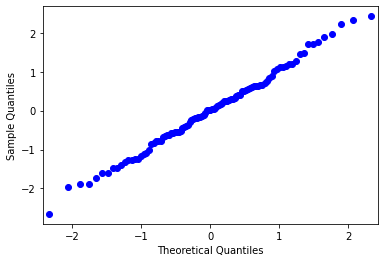

In [96]:
plt.scatter(x1,x2)
plt.show()

fig = sm.qqplot(res.resid)


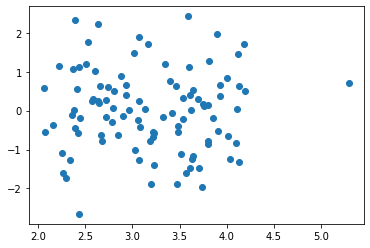

In [98]:
plt.scatter(res.fittedvalues, res.resid)
plt.show()

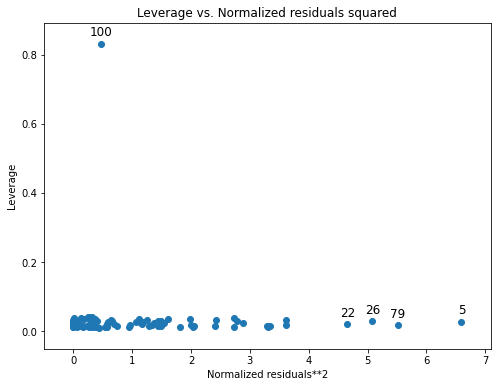

In [100]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plr(res, ax = ax)

#we have a high leverage outlier in the model (the news added point)

In [107]:
df = pd.read_csv("Datasets\Boston.csv")
print(df.head())
df.columns

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  


Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')

In [153]:
coefficients = []

for x in range(2,13):
    y = f"crim ~ {df.columns[x]}"
    res = smf.ols(y,df).fit()
    print(res.summary())
    coefficients.append(res.params[1])

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           5.51e-06
Time:                        14:37:33   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

In [154]:
y = f"crim ~ zn"
for x in range(3,13):
    y = y + f" + {df.columns[x]}"
print(y)
result = smf.ols(y, df).fit()
print(result.summary())
result.params[1:]

crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     34.47
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           2.25e-54
Time:                        14:37:38   Log-Likelihood:                -1662.3
No. Observations:                 506   AIC:                             3349.
Df Residuals:                     494   BIC:                             3399.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

zn         0.036346
indus     -0.062997
chas      -1.490141
nox       -5.989765
rm        -0.180914
age       -0.001688
dis       -0.702975
rad        0.563842
tax       -0.001012
ptratio   -0.100446
lstat      0.267419
dtype: float64

[-0.07393497740412347, 0.5097763311042313, -1.8927765508037604, 31.24853120112292, -2.684051224113947, 0.10778622713953306, -1.5509016824100992, 0.6179109273272012, 0.029742252822765363, 1.1519827870705854, 0.5488047820623978]


Text(0.5, 0, 'univariate')

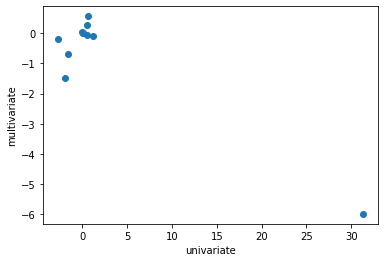

In [159]:
print(coefficients)
plt.scatter(coefficients, result.params[1:])
plt.ylabel("multivariate")
plt.xlabel("univariate")